In [1190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import plotly.graph_objects as go
import pydmd
from sklearn.metrics import mean_absolute_error
from datetime import datetime


In [1191]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE500i.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [1192]:
matx.shape

(461, 1461)

In [1193]:
sym = pd.read_csv("DATA/nse50_sym.csv",header=None) #VARIABLE 2

In [1194]:
j=351
df = []
i=25 # VARIABLE 3
  
mat = matx.iloc[:, -(i+j):-j]
day2 = matx.iloc[:, -(i+j)+1]
mat=mat.to_numpy()


In [1195]:
day0 = matx.iloc[:, -j-1]
day1 = matx.iloc[:, -j]
day2 = matx.iloc[:, -j+1]
day3 = matx.iloc[:, -j+2]
day4 = matx.iloc[:, -j+3]
day5 = matx.iloc[:, -j+4]
day6 = matx.iloc[:, -j+5]
day7 = matx.iloc[:, -j+6]
day8 = matx.iloc[:, -j+7]
day9 = matx.iloc[:, -j+8]

In [1196]:
dmd = pydmd.DMD(svd_rank=mat.shape[1])
dmd.fit(mat)
dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
dmd.reconstructed_data.shape

(461, 34)

In [1197]:
pred = dmd.reconstructed_data
pday1 = np.real(pred[:,-9])
pday2 = np.real(pred[:,-8])
pday3 = np.real(pred[:,-7])
pday4 = np.real(pred[:,-6])
pday5 = np.real(pred[:,-5])
pday6 = np.real(pred[:,-4])
pday7 = np.real(pred[:,-3])
pday8 = np.real(pred[:,-2])
pday9 = np.real(pred[:,-1])


In [1198]:
print("day1 : ",mean_absolute_error(day1,pday1))
print("day2 : ",mean_absolute_error(day2,pday2))
print("day3 : ",mean_absolute_error(day3,pday3))
print("day4 : ",mean_absolute_error(day4,pday4))
print("day5 : ",mean_absolute_error(day5,pday5))
print("day6 : ",mean_absolute_error(day6,pday6))
print("day7 : ",mean_absolute_error(day7,pday7))
print("day8 : ",mean_absolute_error(day8,pday8))
print("day9 : ",mean_absolute_error(day9,pday9)) 

day1 :  23.93367732984239
day2 :  28.80251675413484
day3 :  39.383224405916806
day4 :  37.49028053955498
day5 :  39.49303579695816
day6 :  39.15861266491327
day7 :  45.13507432228127
day8 :  43.554854204989404
day9 :  48.39978350469992


EXAMPLE

1	ADANIPORTS.NS

2nd in array 

In [1199]:
print("day1 : ",day1[1]," - pred :",pday1[1])
print("day2 : ",day2[1]," - pred :",pday2[1])
print("day3 : ",day3[1]," - pred :",pday3[1])
print("day4 : ",day4[1]," - pred :",pday4[1])
print("day5 : ",day5[1]," - pred :",pday5[1])


day1 :  1739.25  - pred : 1711.7772913467454
day2 :  1806.550049  - pred : 1711.5466179647512
day3 :  1809.449951  - pred : 1703.4328272878313
day4 :  1824.050049  - pred : 1745.9545386802583
day5 :  1809.800049  - pred : 1754.961218330671


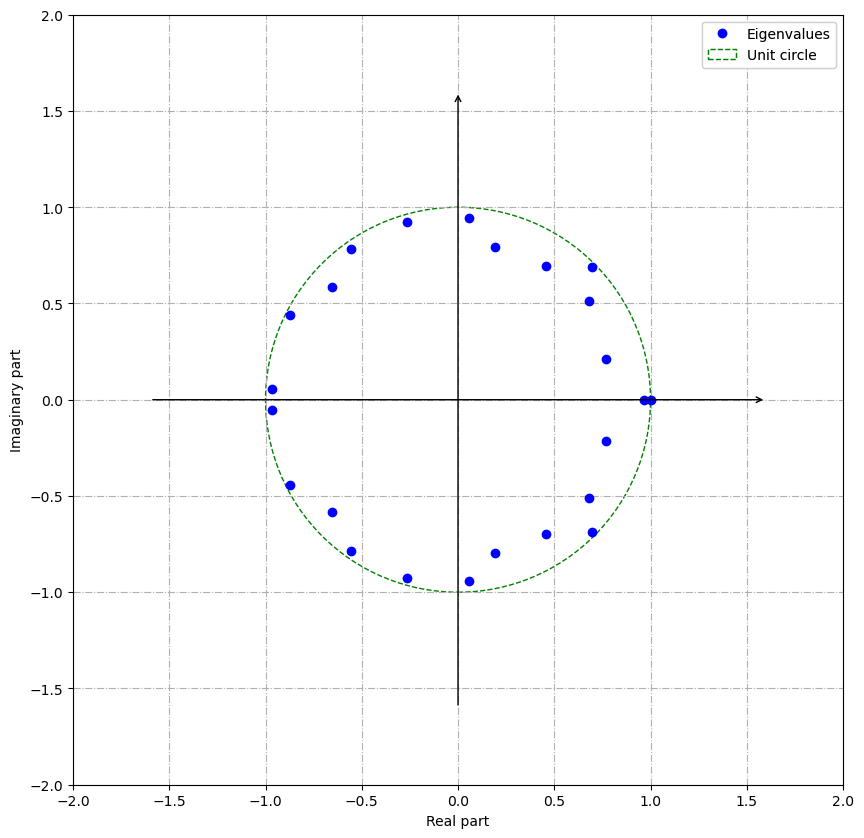

In [1200]:
dmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(10,10))

In [1201]:
dmd.amplitudes.real

array([-5.92981770e+01, -5.92981770e+01,  2.56203147e+02,  2.56203147e+02,
        4.97329005e+02,  4.97329005e+02, -1.92706635e+02, -1.92706635e+02,
       -1.21997456e+02, -1.21997456e+02, -2.07339783e+02, -2.07339783e+02,
        5.02060020e+02,  5.02060020e+02, -3.98069561e+03, -3.98069561e+03,
        5.17750471e+02,  5.17750471e+02,  9.13666545e+04,  2.27733728e+04,
       -6.75031192e+03, -6.75031192e+03, -2.55543481e+03, -2.55543481e+03])

c:\Users\HAI\anaconda3\envs\normie\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


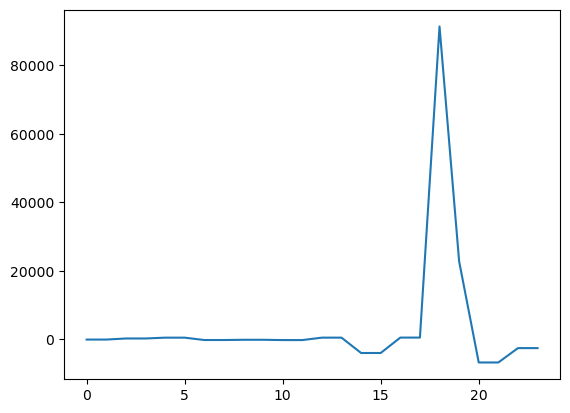

In [1202]:
plt.plot(dmd.amplitudes)

In [1203]:
np.max(dmd.amplitudes.real)

91366.65445808308

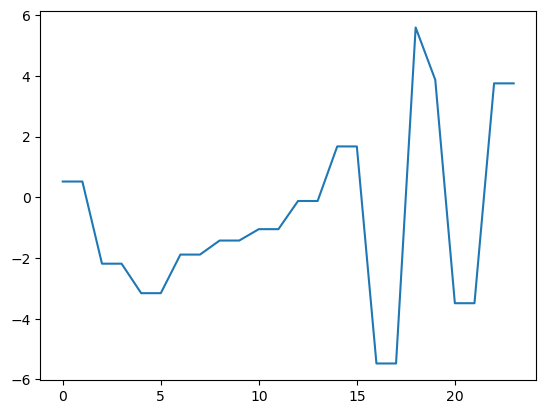

In [1204]:
plt.plot(np.sum(dmd.modes.real,axis=0))


In [1205]:
d_ind = np.argmax(np.abs(dmd.amplitudes.real))

if np.amax(np.abs(dmd.amplitudes.real)) == np.abs(np.min(dmd.amplitudes.real))  :
    print("Not growing")

d_ind

18

In [1206]:
dmd.eigs.real[d_ind]

1.0036899329180924

In [1207]:
dmd.eigs.real

array([-0.96499219, -0.96499219, -0.87404997, -0.87404997, -0.6537272 ,
       -0.6537272 , -0.55556276, -0.55556276, -0.2646856 , -0.2646856 ,
        0.0594899 ,  0.0594899 ,  0.18948155,  0.18948155,  0.4564309 ,
        0.4564309 ,  0.69614369,  0.69614369,  1.00368993,  0.96483029,
        0.77066202,  0.77066202,  0.68259734,  0.68259734])

<StemContainer object of 3 artists>

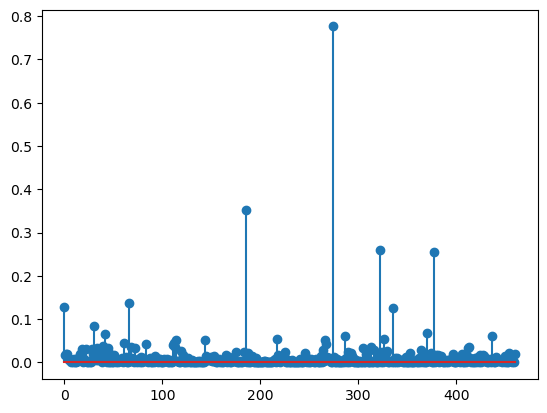

In [1208]:

plt.stem(dmd.modes[:,d_ind].real)


[ 66 377 322 185 274]


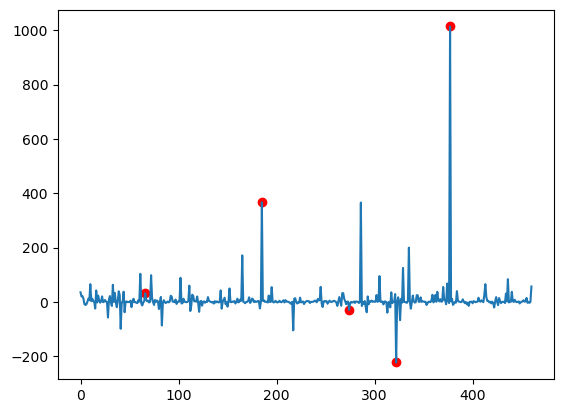

In [1210]:
dmode = dmd.modes[:,d_ind].real
diff=day1-day0
plt.plot(diff)


# Find the indices of the top 5 elements
top_5_indices = np.argsort(dmode.real)[-5:]
print(top_5_indices)

# Mark the indices on the plot
plt.scatter(top_5_indices,diff[top_5_indices], color='red')

plt.show()
